In [14]:
from IPython.lib.deepreload import original_import
%load_ext autoreload
%autoreload 2

import ex4
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Example of a test script

In [ ]:
import modular_ex4
import imageio
import matplotlib.pyplot as plt

# ----------------- הגדרות ניסוי -----------------
VIDEO_FILE = "House.mp4"
STEP_SIZE = 16        # פרמטר לשליטה
BORDER_CUT = 15       # פרמטר לשליטה
ENABLE_ROT = True     # עם או בלי תיקון רוטציה
CONV_POINT = None     # אופציונלי: (x,y)
# CONV_POINT = (300, 250) # לדוגמה, אם אתה רוצה למרכז אובייקט

# ----------------- ביצוע ה-Pipeline -----------------

# 1. טעינה (פעם אחת)
raw_frames = modular_ex4.load_video_frames(VIDEO_FILE, downscale_factor=2)
h, w = raw_frames[0].shape[:2]

# 2. ייצוב (פעם אחת, לוקח זמן)
# מעבירים כאן את הפרמטרים כי הייצוב מחשב optical_flow
stable_frames = modular_ex4.stabilize_video(
    raw_frames,
    step_size=STEP_SIZE,
    border_cut=BORDER_CUT,
    enable_rotation=ENABLE_ROT
)

# 3. חישוב נתיב וגיאומטריה (מהיר)
# גם כאן מעבירים את הפרמטרים כי הוא מחשב שוב optical_flow על המיוצב
transforms = modular_ex4.compute_camera_path(
    stable_frames,
    step_size=STEP_SIZE,
    border_cut=BORDER_CUT,
    convergence_point=CONV_POINT
)

canvas_geo = modular_ex4.compute_canvas_geometry(transforms, h, w)

# 4. יצירת סרטון פנורמה (Multi-Perspective)
# כאן מייצרים פנורמות שונות על ידי שינוי ה-Anchor
print("Rendering multi-perspective movie...")
movie_frames = []
anchors = np.linspace(0, 1, num=20) # 20 פריימים לסרטון

for anchor in anchors:
    # שלב הרינדור לא צריך step_size כי אין בו חישוב תנועה, רק גזירה
    pan = modular_ex4.render_strip_panorama(stable_frames, transforms, canvas_geo, strip_anchor=anchor)

    # המרה ל-uint8 לשמירה בוידאו
    pan_uint8 = (np.clip(pan, 0, 1) * 255).astype(np.uint8)
    movie_frames.append(pan_uint8)

# שמירת התוצאה
imageio.mimsave("outputs/multi_perspective_output.mp4", movie_frames, fps=10)
print("Done! Video saved.")

In [ ]:
# שמירת תמונה אחת לדוגמה (מהמרכז)
simple_panorama = modular_ex4.render_strip_panorama(stable_frames, transforms, canvas_geo, strip_padding=1, interp_order=3,prefilter=True)
modular_ex4.save_panorama(simple_panorama, filename="center_view.jpg")

### lab

In [24]:
# garden_video="Garden.mp4"
house_video="House.mp4"
# kessaria_video="Kessaria.mp4"
frames = ex4.load_video_frames(house_video, downscale_factor=2)
panorama = ex4.create_mosaic(frames, step_size=16, border_cut=15)
print("done.")

Loading video from: Exercise Inputs/House.mp4
Loaded 435 RGB frames. Shape: (435, 360, 640, 3)
Step 1: Stabilizing Video...
Stabilizing video (Rotation Correction=True)...
Processed frame 0/435
Processed frame 10/435
Processed frame 20/435
Processed frame 30/435
Processed frame 40/435
Processed frame 50/435
Processed frame 60/435
Processed frame 70/435
Processed frame 80/435
Processed frame 90/435
Processed frame 100/435
Processed frame 110/435
Processed frame 120/435
Processed frame 130/435
Processed frame 140/435
Processed frame 150/435
Processed frame 160/435
Processed frame 170/435
Processed frame 180/435
Processed frame 190/435
Processed frame 200/435
Processed frame 210/435
Processed frame 220/435
Processed frame 230/435
Processed frame 240/435
Processed frame 250/435
Processed frame 260/435
Processed frame 270/435
Processed frame 280/435
Processed frame 290/435
Processed frame 300/435
Processed frame 310/435
Processed frame 320/435
Processed frame 330/435
Processed frame 340/435

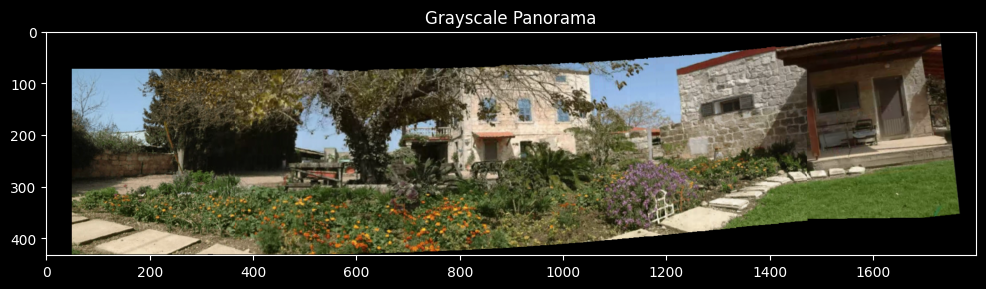

In [25]:
plt.figure(figsize=(12, 6))
plt.imshow(panorama, cmap='gray')
plt.title("Grayscale Panorama")
plt.show()

In [26]:
ex4.save_panorama(panorama, filename="House_panorama_rot.png")

Saving panorama to: outputs/House_panorama_rot.png...
Success! Image saved.


Analyzing camera path...


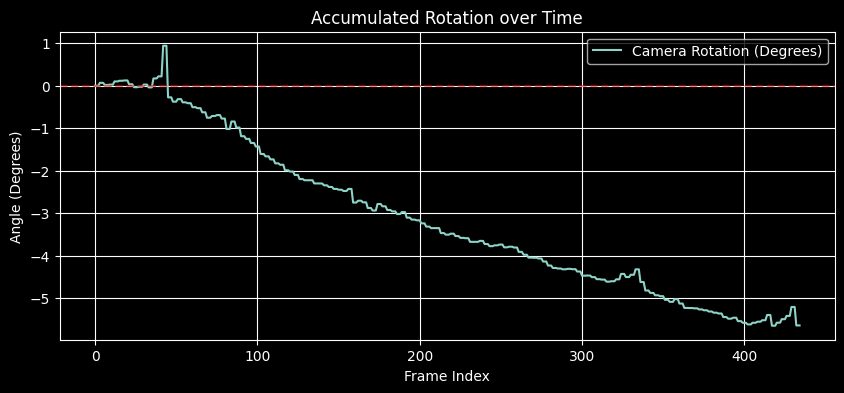

Total Rotation: -5.64 degrees


[0,
 np.float64(3.6793235516335354e-06),
 np.float64(9.653912915015422e-06),
 np.float64(0.06974586167676149),
 np.float64(0.0697475613501533),
 np.float64(0.06974755370965839),
 np.float64(0.020166850113284042),
 np.float64(0.020156085199587868),
 np.float64(0.020149616251893984),
 np.float64(0.02702018046126901),
 np.float64(0.027094512953555024),
 np.float64(0.027105853582122752),
 np.float64(0.10284581157522152),
 np.float64(0.1028353981108015),
 np.float64(0.10277788639639886),
 np.float64(0.11868468602966457),
 np.float64(0.11867683105740329),
 np.float64(0.11865693806929892),
 np.float64(0.12617085691760582),
 np.float64(0.1261836749155943),
 np.float64(0.12617846561290655),
 np.float64(0.03603892764170007),
 np.float64(0.03601813199789735),
 np.float64(0.03605459147946058),
 np.float64(-0.03327410411632801),
 np.float64(-0.03325522608921494),
 np.float64(-0.03324821738076235),
 np.float64(-0.02281964676607834),
 np.float64(-0.022831098644145686),
 np.float64(-0.0228313717672292

In [23]:
from skimage.color import rgb2gray  # וודא שיש לך את האימפורט הזה

def plot_camera_path(frames, step_size, border_cut):
    thetas = [0]
    cumulative_theta = 0

    print("Analyzing camera path...")
    for i in range(len(frames) - 1):
        # שליפת הפריימים
        im1 = frames[i]
        im2 = frames[i+1]

        # --- התיקון: בדיקה והמרה לאפור אם צריך ---
        if im1.ndim == 3:
            im1 = rgb2gray(im1)
        if im2.ndim == 3:
            im2 = rgb2gray(im2)
        # ------------------------------------------

        # כעת im1 ו-im2 הם דו-ממדיים והפונקציה תעבוד
        _, _, theta = ex4.optical_flow(im1, im2, step_size, border_cut)

        cumulative_theta += theta
        thetas.append(np.rad2deg(cumulative_theta))

    plt.figure(figsize=(10, 4))
    plt.plot(thetas, label='Camera Rotation (Degrees)')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
    plt.title("Accumulated Rotation over Time")
    plt.xlabel("Frame Index")
    plt.ylabel("Angle (Degrees)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Total Rotation: {thetas[-1]:.2f} degrees")
    return thetas

plot_camera_path(frames, step_size=16, border_cut=15)